In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
microdadosEnem = pd.read_csv("microdados_enem_2021/DADOS/MICRODADOS_ENEM_2021.csv", sep=";", encoding='ISO_8859_1')

In [3]:
microdadosEnem.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', '

SELECIONAMOS APENAS AS COLUNAS QUE NOS INTERESSA

In [4]:
colunas=['NU_INSCRICAO','NU_NOTA_MT','NU_NOTA_REDACAO', 'Q001', 'Q002', 'SG_UF_ESC']

CRIAMOS UM DATAFRAME COM AS COLUNAS SELECIONADAS DF1, E DEPOIS UM MENOR COM MENOS COLUNAS DF2. 

In [5]:
df1=microdadosEnem.filter(items=colunas).dropna()

<b>Q001: Até que série seu pai, ou o homem responsável por você, estudou?<br>
<b>Q002: Até que série sua mãe, ou a mulher responsável por você, estudou?<br> 

DEFINIR UM DICIONÁRIO COM AS RESPOSTAS COMPLETAS <BR>
    {x:xx, z:zz...}

## CRIAR NOVAS COLUNAS NO DATASET

In [6]:
dic_q001eq002={'A': 'Nunca estudou', 'B':'Não completou a 4 série/5 ano do EF',
               'C':'Completou a 4 série/5 ano do EF mas não a 8 do EF',
               'D':'Completou a 8 do EF mas não o EM',
               'E':'Completou o EM, mas não fez ES',
               'F': 'Completou o ES mas não completou PG',
               'G': 'Completou PG',
               'H':'Não sei'}

In [7]:
df1.filter(items=['NU_INSCRICAO','Q001']).groupby('Q001').count()

,NU_INSCRICAO
Q001,
A,12655
B,67362
C,69061
D,69224
E,195754
F,78700
G,61392
H,48303


'NOME_Q001 é o nome da minha nova coluna <BR>
 Ao abrir [] estamos pedindo que a informação dentro deles gere uma lista, e esta lista será atribuída a RESP <br>
Neste caso, para cada elemento da DF2.'Q001' queremos a resposta correspondente do dicionário

In [12]:
df1['EDUCACAO_PAI']=[dic_q001eq002[resp] for resp in df1.Q001]

In [13]:
df1['EDUCACAO_MAE']=[dic_q001eq002[resp] for resp in df1.Q002]

In [14]:
df1.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,SG_UF_ESC,EDUCACAO_MAE,EDUCACAO_PAI
3,210052128335,659.5,780.0,B,B,CE,Não completou a 4 série/5 ano do EF,Não completou a 4 série/5 ano do EF
4,210051353021,582.6,780.0,D,E,CE,"Completou o EM, mas não fez ES",Completou a 8 do EF mas não o EM
33,210053085526,423.0,700.0,C,C,BA,Completou a 4 série/5 ano do EF mas não a 8 do EF,Completou a 4 série/5 ano do EF mas não a 8 do EF
45,210052916275,570.2,640.0,H,E,ES,"Completou o EM, mas não fez ES",Não sei
51,210051417174,579.4,680.0,E,F,ES,Completou o ES mas não completou PG,"Completou o EM, mas não fez ES"


### Vamos comparar a distribuição do nível de escolaridade dos pais e das mães dos candidatos

Distribuição dos candidatos por escolaridade do PAI

In [15]:
df1.filter(items= ['NU_INSCRICAO', 'EDUCACAO_PAI']).groupby('EDUCACAO_PAI').count().sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
EDUCACAO_PAI,
"Completou o EM, mas não fez ES",195754
Completou o ES mas não completou PG,78700
Completou a 8 do EF mas não o EM,69224
Completou a 4 série/5 ano do EF mas não a 8 do EF,69061
Não completou a 4 série/5 ano do EF,67362
Completou PG,61392
Não sei,48303
Nunca estudou,12655


Distribuição dos candidatos por escolaridade da MÂE

In [16]:
df1.filter(items= ['NU_INSCRICAO', 'EDUCACAO_MAE']).groupby('EDUCACAO_MAE').count().sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
EDUCACAO_MAE,
"Completou o EM, mas não fez ES",220827
Completou o ES mas não completou PG,99994
Completou PG,97657
Completou a 8 do EF mas não o EM,66219
Completou a 4 série/5 ano do EF mas não a 8 do EF,52718
Não completou a 4 série/5 ano do EF,42030
Não sei,16295
Nunca estudou,6711


<H5 style="color:green"> Comparando esses resultados podemos perceber que as mães estudam mais que os pais, tendo mais mães completado o EM, o ES e PG.<br>
Podemos perceber também que a resposta não sei pode indicar que muitos candidatos não conhecem os pais, pois 124.057 candidatos sabiam responder pela mãe, mas não sabiam pelo pai</div>
    

<H4 style="color:black">Agora vamos olhar para a média de matemática de acordo com a escolaridade Pai x Mãe </div>

In [17]:
plot_mat_pai=df1.filter(items= ['NU_NOTA_MT', 'EDUCACAO_PAI']).groupby('EDUCACAO_PAI').mean().sort_values(by='NU_NOTA_MT', ascending=False)

In [18]:
plot_mat_pai.head()

,NU_NOTA_MT
EDUCACAO_PAI,
Completou PG,622.509529
Completou o ES mas não completou PG,602.427526
"Completou o EM, mas não fez ES",546.323825
Completou a 8 do EF mas não o EM,521.706111
Completou a 4 série/5 ano do EF mas não a 8 do EF,509.969068


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 [Text(-1.0, 0, 'Nunca estudou'),
  Text(0.0, 0, 'Completou PG'),
  Text(1.0, 0, 'Completou o ES mas não completou PG'),
  Text(2.0, 0, 'Completou o EM, mas não fez ES'),
  Text(3.0, 0, 'Completou a 8 do EF mas não o EM'),
  Text(4.0, 0, 'Completou a 4 série/5 ano do EF mas não a 8 do EF'),
  Text(5.0, 0, 'Não sei'),
  Text(6.0, 0, 'Não completou a 4 série/5 ano do EF'),
  Text(7.0, 0, 'Nunca estudou'),
  Text(8.0, 0, '')])

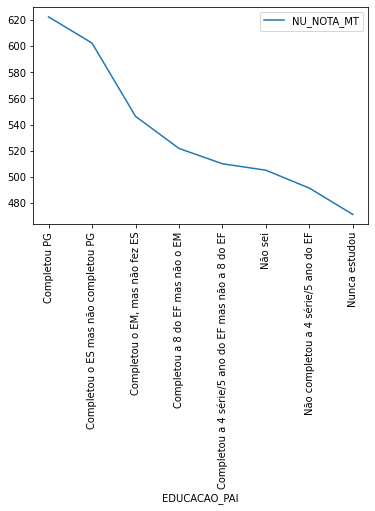

In [19]:
plot_mat_pai.plot()
plt.xticks(rotation=90)

In [20]:
plot_mat_mae=df1.filter(items= ['NU_NOTA_MT', 'EDUCACAO_MAE']).groupby('EDUCACAO_MAE')\
.mean().sort_values(by='NU_NOTA_MT', ascending=False)

In [21]:
plot_mat_mae.head()

,NU_NOTA_MT
EDUCACAO_MAE,
Completou PG,600.226162
Completou o ES mas não completou PG,588.575965
"Completou o EM, mas não fez ES",536.704141
Completou a 8 do EF mas não o EM,509.004301
Completou a 4 série/5 ano do EF mas não a 8 do EF,498.396806


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 [Text(-1.0, 0, 'Nunca estudou'),
  Text(0.0, 0, 'Completou PG'),
  Text(1.0, 0, 'Completou o ES mas não completou PG'),
  Text(2.0, 0, 'Completou o EM, mas não fez ES'),
  Text(3.0, 0, 'Completou a 8 do EF mas não o EM'),
  Text(4.0, 0, 'Completou a 4 série/5 ano do EF mas não a 8 do EF'),
  Text(5.0, 0, 'Não sei'),
  Text(6.0, 0, 'Não completou a 4 série/5 ano do EF'),
  Text(7.0, 0, 'Nunca estudou'),
  Text(8.0, 0, '')])

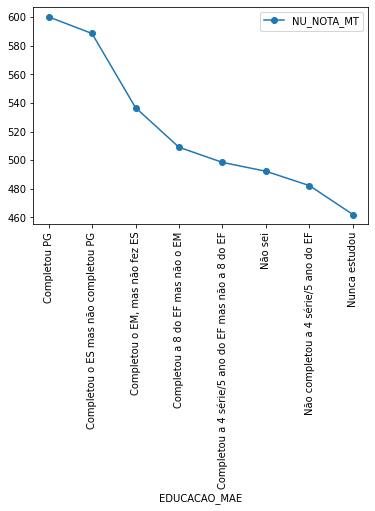

In [40]:
plot_mat_mae.plot(marker='o')
plt.xticks(rotation=90)



<H5 style="color:green">Percebemos que existe uma correlação entre a média de matemática dos alunos e o nível de escolaridade dos pais. Quanto mais os pais estudaram, melhor foi a média em matemática do candidato</div>

# SERÁ QUE A TENDÊNCIA SE MANTÉM EM TODOS OS ESTADOS?

In [23]:
df1['SG_UF_ESC']=df1.SG_UF_ESC
df1.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,SG_UF_ESC,EDUCACAO_MAE,EDUCACAO_PAI
3,210052128335,659.5,780.0,B,B,CE,Não completou a 4 série/5 ano do EF,Não completou a 4 série/5 ano do EF
4,210051353021,582.6,780.0,D,E,CE,"Completou o EM, mas não fez ES",Completou a 8 do EF mas não o EM
33,210053085526,423.0,700.0,C,C,BA,Completou a 4 série/5 ano do EF mas não a 8 do EF,Completou a 4 série/5 ano do EF mas não a 8 do EF
45,210052916275,570.2,640.0,H,E,ES,"Completou o EM, mas não fez ES",Não sei
51,210051417174,579.4,680.0,E,F,ES,Completou o ES mas não completou PG,"Completou o EM, mas não fez ES"


ADICIONAMOS MAIS UMA COLUNA AO DF1 

In [24]:
df1_es=df1.filter(items= ['NU_NOTA_MT', 'EDUCACAO_MAE']).where(df1.SG_UF_ESC=='ES')\
.groupby('EDUCACAO_MAE')\
.mean().sort_values(by='NU_NOTA_MT', ascending=False)
df1_es.head()

,NU_NOTA_MT
EDUCACAO_MAE,
Completou o ES mas não completou PG,602.459176
Completou PG,600.865207
"Completou o EM, mas não fez ES",546.107136
Completou a 8 do EF mas não o EM,521.487933
Completou a 4 série/5 ano do EF mas não a 8 do EF,514.417296


In [25]:
df2_es=df1.filter(items= ['NU_NOTA_MT', 'EDUCACAO_PAI']).where(df1.SG_UF_ESC=='ES')\
.groupby('EDUCACAO_PAI')\
.mean().sort_values(by='NU_NOTA_MT', ascending=False)
df2_es.head()

,NU_NOTA_MT
EDUCACAO_PAI,
Completou PG,631.384356
Completou o ES mas não completou PG,610.164769
"Completou o EM, mas não fez ES",554.828432
Completou a 8 do EF mas não o EM,539.632162
Completou a 4 série/5 ano do EF mas não a 8 do EF,521.796011


In [26]:
df1

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,SG_UF_ESC,EDUCACAO_MAE,EDUCACAO_PAI
3,210052128335,659.5,780.0,B,B,CE,Não completou a 4 série/5 ano do EF,Não completou a 4 série/5 ano do EF
4,210051353021,582.6,780.0,D,E,CE,"Completou o EM, mas não fez ES",Completou a 8 do EF mas não o EM
33,210053085526,423.0,700.0,C,C,BA,Completou a 4 série/5 ano do EF mas não a 8 do EF,Completou a 4 série/5 ano do EF mas não a 8 do EF
45,210052916275,570.2,640.0,H,E,ES,"Completou o EM, mas não fez ES",Não sei
51,210051417174,579.4,680.0,E,F,ES,Completou o ES mas não completou PG,"Completou o EM, mas não fez ES"
...,...,...,...,...,...,...,...,...
3387928,210053232577,499.1,560.0,E,E,BA,"Completou o EM, mas não fez ES","Completou o EM, mas não fez ES"
3389073,210051724712,389.0,540.0,D,F,BA,Completou o ES mas não completou PG,Completou a 8 do EF mas não o EM
3389248,210051125662,504.9,420.0,B,B,SP,Não completou a 4 série/5 ano do EF,Não completou a 4 série/5 ano do EF
3389288,210052134860,407.3,580.0,H,C,BA,Completou a 4 série/5 ano do EF mas não a 8 do EF,Não sei


### GROUP BY PARA MOSTRAR A NOTA DA REDAÇÃO CONFORME EDUCAÇÃO DA MAE EM CADA ESTADO

In [27]:
df1.filter(items=['SG_UF_ESC','NU_NOTA_REDACAO','EDUCACAO_MAE'])\
.groupby(['SG_UF_ESC', 'EDUCACAO_MAE'])\
.mean()

NU_NOTA_REDACAO
SG_UF_ESC EDUCACAO_MAE                                                      
AC        Completou PG                                            668.482143
          Completou a 4 série/5 ano do EF mas não a 8 do EF       534.674556
          Completou a 8 do EF mas não o EM                        564.066390
          Completou o EM, mas não fez ES                          580.881543
          Completou o ES mas não completou PG                     649.010989
...                                                                      ...
TO        Completou o EM, mas não fez ES                          585.810729
          Completou o ES mas não completou PG                     648.120805
          Nunca estudou                                           465.333333
          Não completou a 4 série/5 ano do EF                     489.285714
          Não sei                                                 524.905660

[216 rows x 1 columns]

## DETALHES DE GRÁFICOS NO MATPLOTLIB

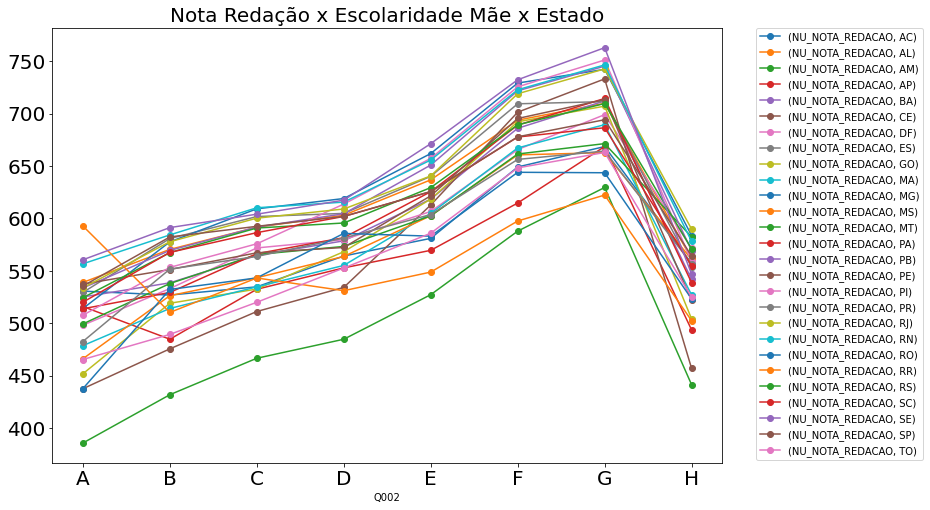

In [32]:
#fig, ax=plt.subplots(figsize=(15,10))
#plt.xticks(rotation=90)
#plt.suptitle('Nota Redação x Escolaridade Mãe x Estado')

ax=df1.filter(items=['SG_UF_ESC','NU_NOTA_REDACAO','Q002'])\
.groupby(['Q002','SG_UF_ESC', ])\
.mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)\
.unstack().plot(figsize=(12,8), fontsize=20, marker='o') #colormap='plasma' poderia alterar as cores das linhas do plot

#UNSTACK = DESIMPILHAR, OU SEJA, SEPARAR POR GRUPOS DE ESTADO

ax.set_title('Nota Redação x Escolaridade Mãe x Estado', fontsize=20)
ax.legend(bbox_to_anchor=(1.05,1), loc=0, borderaxespad=0) 

#Classe axes
#método legend para mexer na legenda, bbox_to_anchor usa a referencia de localização dentro do grafico 
#de 0.0 (começo da linha) ate 1.1(final da linha), sendo 0,5 no meio do gráfico
#Usando o 1.05 a caixa de legenda sai da area do plot e vai um pouco para o lado
#loc=0 posiciona a localização da caixa de legenda
# o borderaxespad altera a altura da caixa de legenda em relação ao plot


UNSTACK = DESIMPILHAR, OU SEJA, SEPARAR POR GRUPOS DE ESTADO

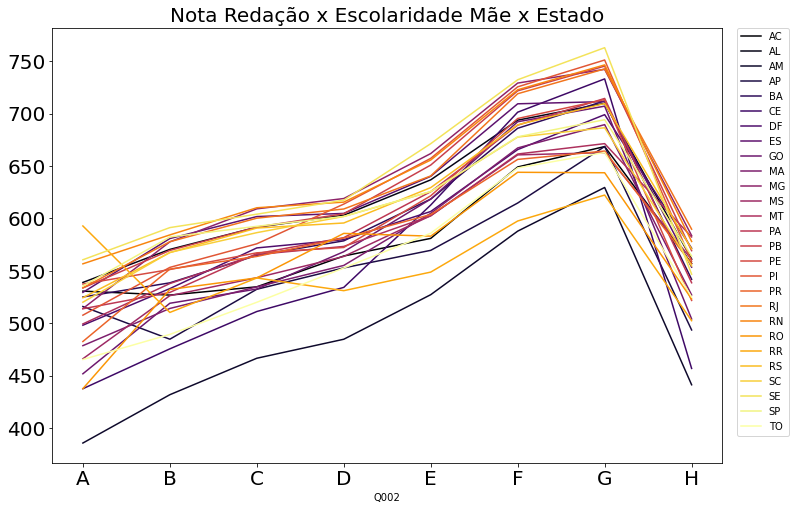

In [29]:
#fig, ax=plt.subplots(figsize=(15,10))
#plt.xticks(rotation=90)
#plt.suptitle('Nota Redação x Escolaridade Mãe x Estado')

ax=df1.filter(items=['SG_UF_ESC','NU_NOTA_REDACAO','Q002'])\
.groupby(['Q002','SG_UF_ESC', ])\
.mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)\
.unstack().plot(figsize=(12,8), fontsize=20, colormap='inferno') 

ax.set_title('Nota Redação x Escolaridade Mãe x Estado', fontsize=20)
ax.legend(bbox_to_anchor=(1.05,1), loc=0, borderaxespad=0) 


handles, labels = ax.get_legend_handles_labels()

import re
edited_labels = [re.search(',\s(.+?)\)', label).group(1) for label in labels]
ax.legend(edited_labels, bbox_to_anchor=(1.1,1), loc=0, borderaxespad=0) 


#ax.get_legend_handles_labels() método do ax. para alterar as legendas
# re= regular expressions, para identificar padrões em palavras e extraír só as palavras que queremos na legenda
# re.search(',\s(.+?)\)' = oque ele deve procurar, neste caso, a vírgula, o espaço (\s)
# pegue tudo (.+?) que for encontrado entre() para cada elemento da lista de labels (legendas)

Text(0, -0.4, 'A : Nunca estudou\nB : Não completou a 4 série/5 ano do EF\nC : Completou a 4 série/5 ano do EF mas não a 8 do EF\nD : Completou a 8 do EF mas não o EM\nE : Completou o EM, mas não fez ES\nF : Completou o ES mas não completou PG\nG : Completou PG\nH : Não sei\n')

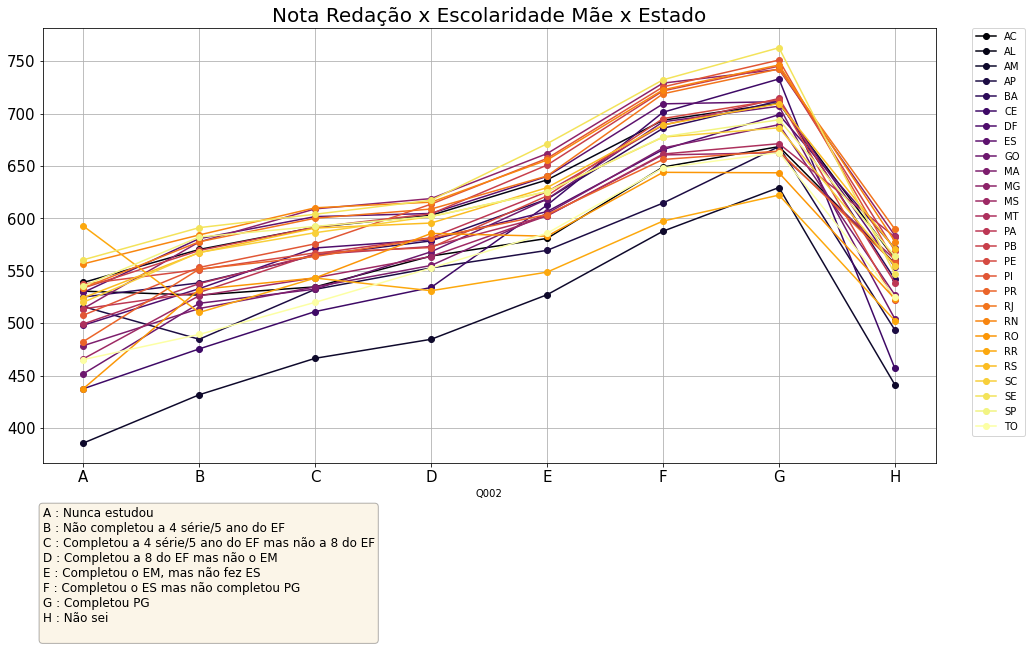

In [34]:
ax=df1.filter(items=['SG_UF_ESC','NU_NOTA_REDACAO','Q002'])\
.groupby(['Q002','SG_UF_ESC', ])\
.mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)\
.unstack().plot(figsize=(16,8), fontsize=15, colormap='inferno', grid=True, marker='o') 

ax.set_title('Nota Redação x Escolaridade Mãe x Estado', fontsize=20)
ax.legend(bbox_to_anchor=(1.05,1), loc=0, borderaxespad=0) 


handles, labels = ax.get_legend_handles_labels()

import re
edited_labels = [re.search(',\s(.+?)\)', label).group(1) for label in labels]
ax.legend(edited_labels, bbox_to_anchor=(1.1,1), loc=0, borderaxespad=0) 

dic_Q002 = "" #string vazia

for key,value in dic_q001eq002.items(): 
    dic_Q002 = dic_Q002 + "{k} : {v}\n".format(k=key, v=value) 

#para cada key e value do dicionario dic_q001eq002.items() o .items() é a versão iteravel do dicionário que permite o for
#adicionar a string vazia as chaves e valores do dicionário .format() é oq perite formatar a string e p \n é o espaço


ax.text(0,-0.4, dic_Q002, transform=ax.transAxes, fontsize=12, 
        bbox={'boxstyle':'round', 'facecolor': 'wheat', 'alpha':0.3})

#ax.text aqui eu jogo a string criada como atributo de texto do ax
# os números são a posição que quero essa string
# bbox com as configurações da caixa da string, alpha é a transparência da caixa
